In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
data = pd.read_csv('csv file\Assignment  Data.csv')
data.head(5)

,Text,Classification
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [9]:
# 
print(data.shape)


(18001, 2)


In [10]:
# CHecking for missing values 

print(data.isnull().sum())


Text              0
Classification    0
dtype: int64


Classification
joy         6058
sadness     5247
anger       2435
fear        2161
love        1463
surprise     637
Name: count, dtype: int64


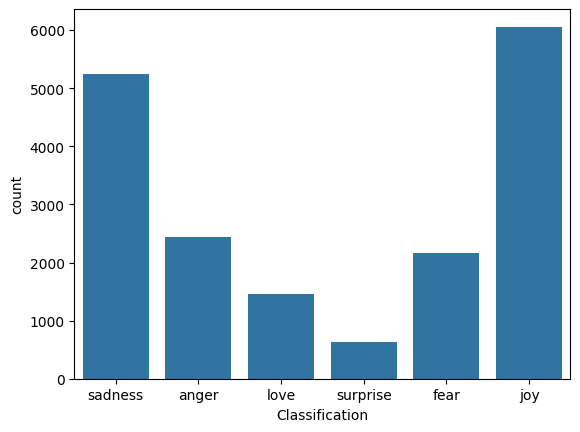

In [11]:
# Class Distribution:

print(data['Classification'].value_counts())
sns.countplot(data=data, x='Classification')
plt.show()


In [12]:
# Average text length in dataset

data['text_length'] = data['Text'].apply(len)
print("Average text length:", data['text_length'].mean())


Average text length: 96.81262152102661


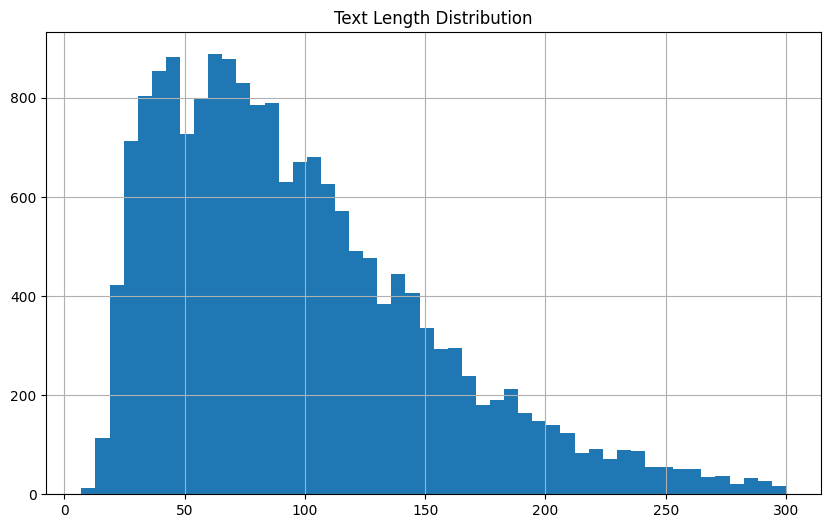

In [13]:
# Visualize  the Text Length Distribution in dataset
plt.figure(figsize=(10, 6))
data['text_length'].hist(bins=50)
plt.title('Text Length Distribution')
plt.show()


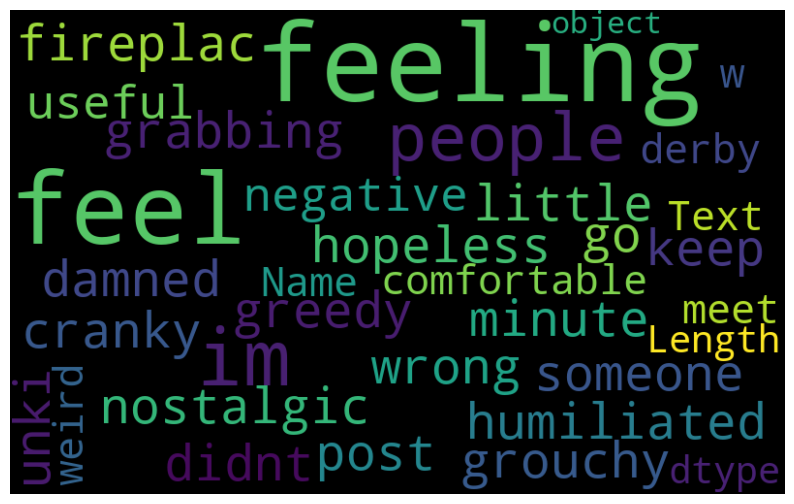

In [16]:
# Visualizing Common Words in data

from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=500, random_state=42, max_font_size=110).generate(str(data['Text']))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()




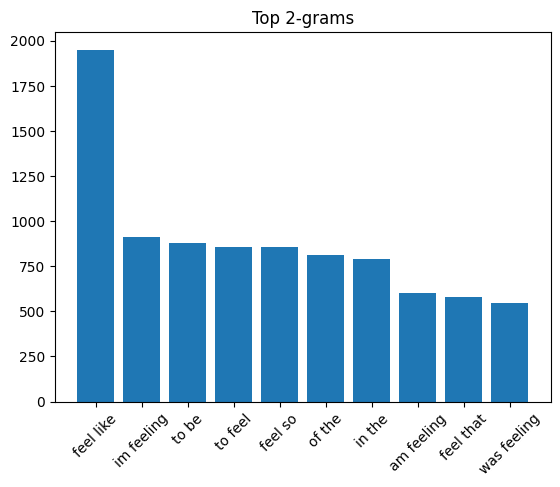

In [18]:
# N-gram Analysis
# To understand commonly occurring groups of words

from sklearn.feature_extraction.text import CountVectorizer

def plot_top_ngrams(data, n=2):
    vec = CountVectorizer(ngram_range=(n, n)).fit(data)
    bag_of_words = vec.transform(data)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)[:10]
    words, frequencies = zip(*words_freq)
    plt.bar(words, frequencies)
    plt.title(f'Top {n}-grams')
    plt.xticks(rotation=45)
    plt.show()

plot_top_ngrams(data['Text'], n=2)  # for bigrams
